In [1]:
import pandas as pd
from darts import TimeSeries

In [2]:
df = pd.read_csv("MY1_2023.csv")

df

,Datetime,id,field1,field2,field3,field4,field5,field6,field7,field8
0,10-01-2023 20:00,503372.0,23.385867,38.066724,442.508711,0.000000,30.0,67.285714,14.428571,15.571429
1,10-01-2023 20:15,503383.0,23.250297,35.728543,503.089431,0.000000,30.0,68.133333,16.933333,18.933333
2,10-01-2023 20:30,503398.0,27.758007,36.726547,950.243902,0.000000,30.0,68.400000,17.666667,19.066667
3,10-01-2023 20:45,503413.0,26.571767,35.528942,1119.024390,4.166667,30.0,68.933333,19.200000,20.400000
4,10-01-2023 21:00,503428.0,24.673784,35.928144,950.569106,0.694444,30.0,69.200000,18.133333,19.133333
...,...,...,...,...,...,...,...,...,...,...
14689,12-06-2023 20:15,684018.0,7.829181,12.375250,105.040650,38.888889,31.0,58.000000,8.200000,9.266667
14690,12-06-2023 20:30,684033.0,7.591934,10.778443,107.967480,38.194444,31.0,58.533333,8.400000,9.066667
14691,12-06-2023 20:45,684048.0,5.931198,9.580838,111.869919,37.268519,31.0,58.600000,8.266667,9.000000
14692,12-06-2023 21:00,684063.0,7.117438,11.177645,112.520325,39.814815,31.0,59.000000,8.733333,9.400000


In [3]:
df1 = df
df1['Datetime'] = pd.to_datetime(df['Datetime'])

df1 = df.set_index('Datetime')
#df1
df2=df1.resample('1H').mean()
df2.reset_index(inplace = True)
df2.head()

,Datetime,id,field1,field2,field3,field4,field5,field6,field7,field8
0,2023-01-02 00:00:00,533870.5,15.895611,21.906188,241.382114,0.0,29.266667,64.566667,6.200000,7.033333
1,2023-01-02 01:00:00,533930.5,21.767497,24.700599,382.845528,0.0,29.000000,68.350000,26.100000,33.833333
2,2023-01-02 02:00:00,533990.5,14.234875,21.457086,179.756098,0.0,28.333333,67.816667,14.000000,17.200000
3,2023-01-02 03:00:00,534050.5,16.666667,21.956088,266.097561,0.0,28.816667,68.583333,12.933333,14.550000
4,2023-01-02 04:00:00,534110.5,9.905101,19.461078,87.642276,0.0,28.550000,67.583333,7.116667,8.083333


In [4]:
df2.isnull().sum()

Datetime       0
id          4460
field1      4460
field2      4460
field3      4460
field4      4460
field5      4460
field6      4460
field7      4460
field8      4460
dtype: int64

In [5]:
df2.fillna(method = 'bfill', inplace=True)
df2

,Datetime,id,field1,field2,field3,field4,field5,field6,field7,field8
0,2023-01-02 00:00:00,533870.5,15.895611,21.906188,241.382114,0.000000,29.266667,64.566667,6.200000,7.033333
1,2023-01-02 01:00:00,533930.5,21.767497,24.700599,382.845528,0.000000,29.000000,68.350000,26.100000,33.833333
2,2023-01-02 02:00:00,533990.5,14.234875,21.457086,179.756098,0.000000,28.333333,67.816667,14.000000,17.200000
3,2023-01-02 03:00:00,534050.5,16.666667,21.956088,266.097561,0.000000,28.816667,68.583333,12.933333,14.550000
4,2023-01-02 04:00:00,534110.5,9.905101,19.461078,87.642276,0.000000,28.550000,67.583333,7.116667,8.083333
...,...,...,...,...,...,...,...,...,...,...
8129,2023-12-06 17:00:00,683845.5,7.295374,12.175649,73.170732,8.796296,28.266667,46.700000,10.900000,11.500000
8130,2023-12-06 18:00:00,683905.5,12.277580,15.019960,99.430894,26.388889,29.966667,53.433333,11.150000,11.600000
8131,2023-12-06 19:00:00,683965.5,10.438909,11.976048,108.130081,34.780093,30.400000,56.816667,9.133333,9.533333
8132,2023-12-06 20:00:00,684025.5,7.473310,11.327345,108.211382,37.500000,31.000000,58.266667,8.433333,9.150000


In [6]:
print(df2.isnull().sum())

Datetime    0
id          0
field1      0
field2      0
field3      0
field4      0
field5      0
field6      0
field7      0
field8      0
dtype: int64


In [7]:
df = df2

target1 = 'field1'
test_l = 168
train_l = len(df) - test_l
date = 'Datetime'
# Create a TimeSeries, specifying the time and value columns
series1 = TimeSeries.from_dataframe(df, date, target1)

# Set aside the last 24 hours as a validation series
train1, val1 = series1[:train_l], series1[train_l:]

target2 = 'field2'
test_l = 168
train_l = len(df) - test_l

# Create a TimeSeries, specifying the time and value columns
series2 = TimeSeries.from_dataframe(df, date, target2)

# Set aside the last 24 hours as a validation series
train2, val2 = series2[:train_l], series2[train_l:]

target3 = 'field3'
test_l = 168
train_l = len(df) - test_l

# Create a TimeSeries, specifying the time and value columns
series3 = TimeSeries.from_dataframe(df, date, target3)

# Set aside the last 24 hours as a validation series
train3, val3 = series3[:train_l], series3[train_l:]

target4 = 'field4'
test_l = 168
train_l = len(df) - test_l

# Create a TimeSeries, specifying the time and value columns
series4 = TimeSeries.from_dataframe(df, date, target4)

# Set aside the last 24 hours as a validation series
train4, val4 = series4[:train_l], series4[train_l:]

target7 = 'field7'
test_l = 168
train_l = len(df) - test_l

# Create a TimeSeries, specifying the time and value columns
series7 = TimeSeries.from_dataframe(df, date, target7)

# Set aside the last 24 hours as a validation series
train7, val7 = series7[:train_l], series7[train_l:]

target8 = 'field8'
test_l = 168
train_l = len(df) - test_l

# Create a TimeSeries, specifying the time and value columns
series8 = TimeSeries.from_dataframe(df, date, target8)

# Set aside the last 24 hours as a validation series
train8, val8 = series8[:train_l], series8[train_l:]

# FourTheta Model

In [8]:
from darts.models import FourTheta
from darts.utils.utils import SeasonalityMode
from darts import TimeSeries

# Create a FourTheta model with additive seasonality
four_theta_model_field1 = FourTheta(theta=2, season_mode=SeasonalityMode.ADDITIVE)
four_theta_model_field2 = FourTheta(theta=2, season_mode=SeasonalityMode.ADDITIVE)
four_theta_model_field3 = FourTheta(theta=2, season_mode=SeasonalityMode.ADDITIVE)
four_theta_model_field4 = FourTheta(theta=2, season_mode=SeasonalityMode.ADDITIVE)
four_theta_model_field7 = FourTheta(theta=2, season_mode=SeasonalityMode.ADDITIVE)
four_theta_model_field8 = FourTheta(theta=2, season_mode=SeasonalityMode.ADDITIVE)

# Convert to univariate time series for each target field
target_fields = ['field1', 'field2', 'field3', 'field4', 'field7', 'field8']
time_series_dict = {}

for target_field in target_fields:
    time_series_dict[target_field] = TimeSeries.from_dataframe(df[['Datetime', target_field]], 'Datetime', target_field)

# Split the time series into training and validation
train_data_dict = {}
val_data_dict = {}

for target_field, time_series in time_series_dict.items():
    train_data_dict[target_field] = time_series[:-168]  # Assuming test_l = 168
    val_data_dict[target_field] = time_series[-168:]

# Fit the FourTheta model to the training data for each target field
four_theta_model_field1.fit(train_data_dict['field1'])
four_theta_model_field2.fit(train_data_dict['field2'])
four_theta_model_field3.fit(train_data_dict['field3'])
four_theta_model_field4.fit(train_data_dict['field4'])
four_theta_model_field7.fit(train_data_dict['field7'])
four_theta_model_field8.fit(train_data_dict['field8'])

# Make predictions using the FourTheta model for the validation data for each target field
forecast_horizon = 168  # Assuming test_l = 168
predictions_field1 = four_theta_model_field1.predict(forecast_horizon)
predictions_field2 = four_theta_model_field2.predict(forecast_horizon)
predictions_field3 = four_theta_model_field3.predict(forecast_horizon)
predictions_field4 = four_theta_model_field4.predict(forecast_horizon)
predictions_field7 = four_theta_model_field7.predict(forecast_horizon)
predictions_field8 = four_theta_model_field8.predict(forecast_horizon)

# You can also use the trained model to make predictions for future time steps
# For example, you can forecast the next 24 time steps into the future
forecast_horizon = 24
future_predictions_field1 = four_theta_model_field1.predict(forecast_horizon)
future_predictions_field2 = four_theta_model_field2.predict(forecast_horizon)
future_predictions_field3 = four_theta_model_field3.predict(forecast_horizon)
future_predictions_field4 = four_theta_model_field4.predict(forecast_horizon)
future_predictions_field7 = four_theta_model_field7.predict(forecast_horizon)
future_predictions_field8 = four_theta_model_field8.predict(forecast_horizon)

Time series has negative values. Fallback to additive and linear model
Time series has negative values. Fallback to additive and linear model
Time series has negative values. Fallback to additive and linear model
Time series has negative values. Fallback to additive and linear model


In [9]:
from darts.metrics import rmse, mae, mape

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Field', 'RMSE', 'MAE', 'MAPE'])

# Define a function to calculate metrics and add them to the DataFrame
def calculate_metrics(field_name, predictions, validation_data):
    rmse_val = rmse(predictions, validation_data)
    mae_val = mae(predictions, validation_data)
    mape_val = mape(predictions, validation_data)
    
    results_df.loc[len(results_df)] = [field_name, rmse_val, mae_val, mape_val]

# Assuming you have defined the val_data_dict and predictions for each field

# Calculate metrics for each target field
for target_field in target_fields:
    predictions = locals()[f'predictions_{target_field}']  # Get the corresponding predictions
    validation_data = val_data_dict[target_field]
    calculate_metrics(target_field, predictions, validation_data)

# Save the results to a CSV file
results_df.to_csv('four_theta_2.csv', index=False)


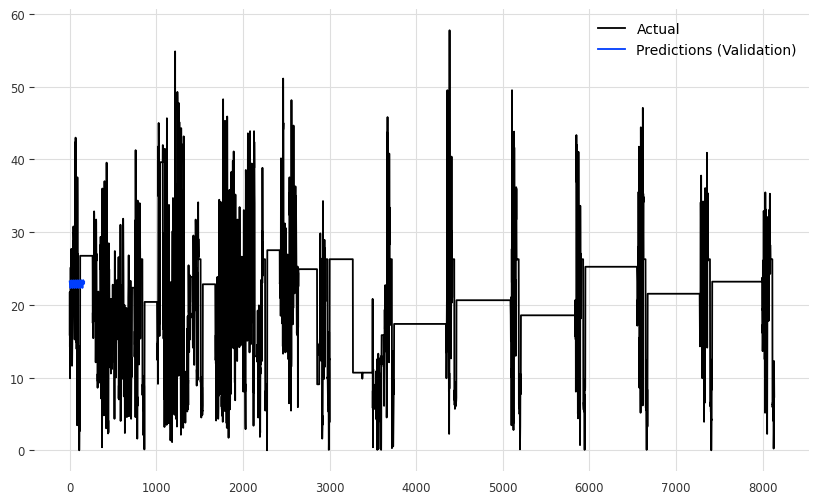

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Convert TimeSeries to NumPy arrays
actual_values = time_series_dict['field1'].values()
predicted_values = predictions_field1.values()

# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label='Actual')
plt.plot(predicted_values, label='Predictions (Validation)')
plt.legend()
plt.show()


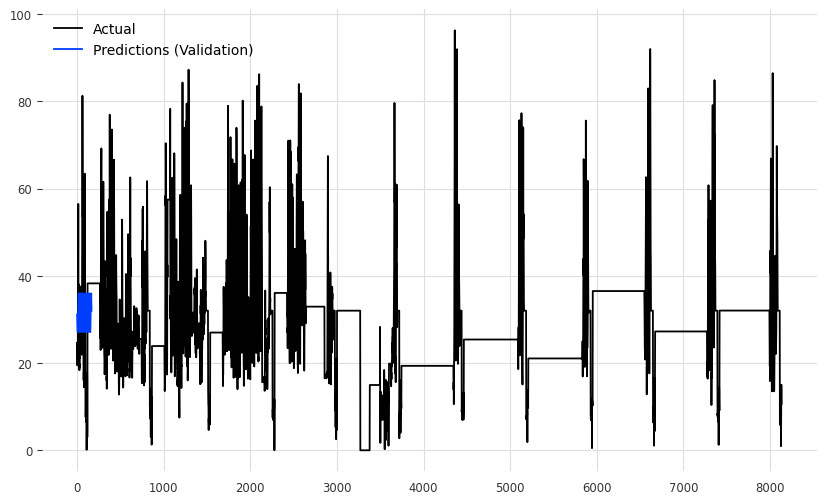

In [11]:
# Convert TimeSeries to NumPy arrays
actual_values = time_series_dict['field2'].values()
predicted_values = predictions_field2.values()

# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label='Actual')
plt.plot(predicted_values, label='Predictions (Validation)')
plt.legend()
plt.show()

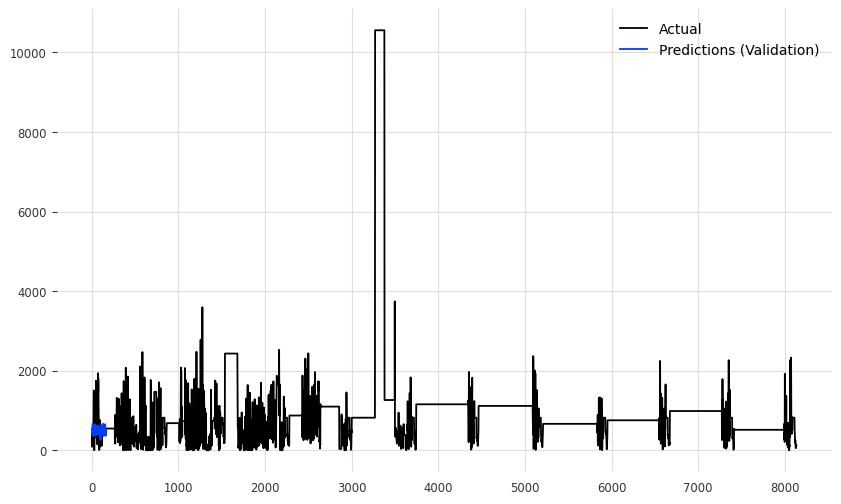

In [12]:
# Convert TimeSeries to NumPy arrays
actual_values = time_series_dict['field3'].values()
predicted_values = predictions_field3.values()

# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label='Actual')
plt.plot(predicted_values, label='Predictions (Validation)')
plt.legend()
plt.show()

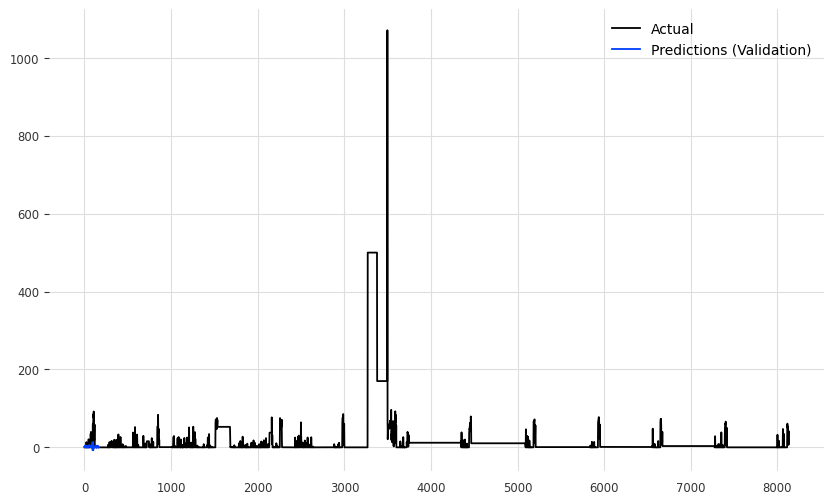

In [13]:
# Convert TimeSeries to NumPy arrays
actual_values = time_series_dict['field4'].values()
predicted_values = predictions_field4.values()

# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label='Actual')
plt.plot(predicted_values, label='Predictions (Validation)')
plt.legend()
plt.show()

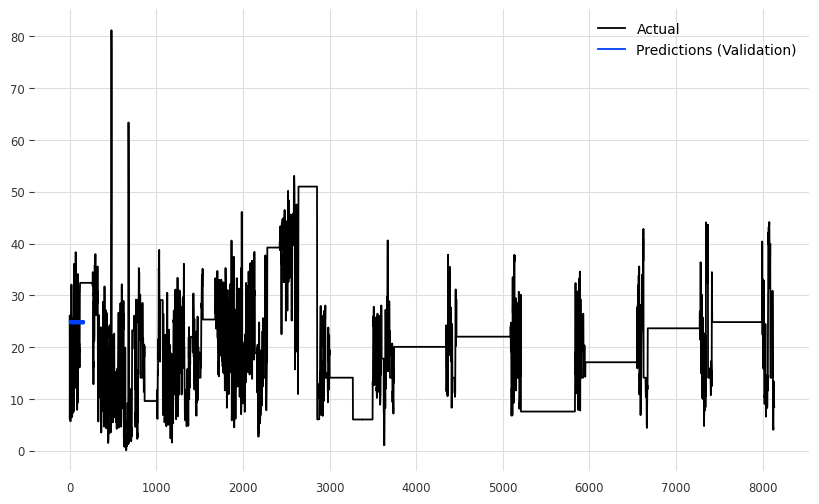

In [14]:
# Convert TimeSeries to NumPy arrays
actual_values = time_series_dict['field7'].values()
predicted_values = predictions_field7.values()

# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label='Actual')
plt.plot(predicted_values, label='Predictions (Validation)')
plt.legend()
plt.show()

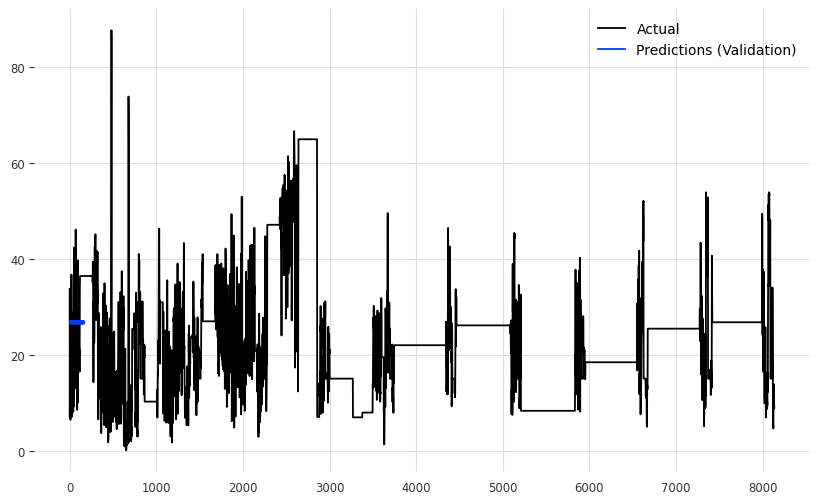

In [15]:
# Convert TimeSeries to NumPy arrays
actual_values = time_series_dict['field8'].values()
predicted_values = predictions_field8.values()

# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label='Actual')
plt.plot(predicted_values, label='Predictions (Validation)')
plt.legend()
plt.show()